In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt
/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt


In [3]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 44.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.25.1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.25.1 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
tensorflow 2.12.0 re

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt", "r") as f:
    articles = f.read().splitlines()
    
    
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt", "r") as f:
    summaries = f.read().splitlines()

In [6]:
df = pd.DataFrame(list(zip(articles,summaries)),columns=["article","summary"])

In [7]:
df.head()

,article,summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...
2,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...,ওয়ালটন কারখানায় শিল্পমন্ত্রী
3,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
4,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার


In [8]:

df['article'][:10]

0    স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...
1    রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...
2    দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...
3    একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...
4    যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...
5    অবরোধে বাস পোড়ানোর অভিযোগে মাগুরা জেলা বিএনপি ...
6    তথ্য প্রযুক্তি ক্ষেত্রে দক্ষ জনশক্তি গড়ে তুলতে...
7    শরীয়তপুরের নড়িয়া উপজেলায় ভুল চিকিৎসায় এক শিশু ...
8    জাতীয় চলচ্চিত্র পুরস্কার ও একুশে পদকজয়ী  নির্ম...
9    বিএনপির লাগাতার অবরোধের মধ্যে রাজধানীর ফকিরাপু...
Name: article, dtype: object

In [9]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [10]:
brief_cleaning1 = text_strip(df['article'])
brief_cleaning2 = text_strip(df['summary'])

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("parser")
nlp.enable_pipe("senter")

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 


#Batch the data points into 5000 and run on all cores for faster preprocessing
article = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000)]


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [12]:
from time import time
t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.33 mins


In [13]:
article[0]

'স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান নির্বাহী কর্মকর্তা হিসেবে দায়িত্ব পেয়েছেন আবরার আনোয়ার।'

In [14]:
summary[0]

'_START_ স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার _END_'

In [15]:
df['cleaned_article'] = pd.Series(article)
df['cleaned_summary'] = pd.Series(summary)

In [16]:
text_count = []
summary_count = []

In [17]:
for sent in df['cleaned_article']:
    text_count.append(len(sent.split()))
for sent in df['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [18]:
graph_df= pd.DataFrame()
graph_df['article']=text_count
graph_df['summary']=summary_count

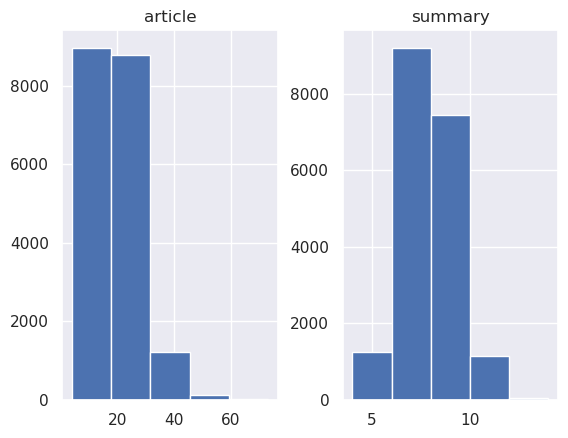

In [19]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [20]:
cnt=0
for i in df['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(df['cleaned_summary']))

1.0


In [21]:
cnt=0
for i in df['cleaned_article']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(df['cleaned_article']))

1.0


In [22]:
max_text_len=100
max_summary_len=15

In [23]:
cleaned_article =np.array(df['cleaned_article'])
cleaned_summary=np.array(df['cleaned_summary'])

short_article=[]
short_summary=[]

for i in range(len(cleaned_article)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_article[i].split())<=max_text_len):
        short_article.append(cleaned_article[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'article':short_article,'summary':short_summary})

In [24]:
post_pre.head(2)

,article,summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,_START_ স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আব...
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,_START_ মার্চের মধ্যে সাভারে চামড়া শিল্পের সিই...


In [26]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [27]:
post_pre.head(2)

,article,summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,sostok sostok _START_ স্ট্যান্ডার্ড চার্টার্ডে...
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,sostok sostok _START_ মার্চের মধ্যে সাভারে চাম...


In [28]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['article']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [29]:
from keras.preprocessing.text import Tokenizer 

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [30]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 74.03157841295629
Total Coverage of rare words: 12.02810853015811


In [31]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [32]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 84.30391499458399
Total Coverage of rare words: 13.668004467268084


In [33]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [34]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [35]:
from keras.utils import pad_sequences
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 19302


In [36]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 19302


In [37]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 

from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 19302
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     3860400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

In [38]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [40]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
135/135 [==============================] - 710s 5s/step - loss: 4.6233 - val_loss: 3.3345
Epoch 2/50
135/135 [==============================] - 697s 5s/step - loss: 3.6464 - val_loss: 3.0246
Epoch 3/50
135/135 [==============================] - 695s 5s/step - loss: 3.4525 - val_loss: 2.9466
Epoch 4/50
135/135 [==============================] - 698s 5s/step - loss: 3.4043 - val_loss: 2.9358
Epoch 5/50
135/135 [==============================] - 706s 5s/step - loss: 3.3838 - val_loss: 2.9264
Epoch 6/50
135/135 [==============================] - 704s 5s/step - loss: 3.3712 - val_loss: 2.9243
Epoch 7/50
135/135 [==============================] - 704s 5s/step - loss: 3.3608 - val_loss: 2.9255
Epoch 8/50
135/135 [==============================] - 702s 5s/step - loss: 3.3522 - val_loss: 2.9162
Epoch 9/50
135/135 [==============================] - 699s 5s/step - loss: 3.3437 - val_loss: 2.9190
Epoch 10/50
135/135 [==============================] - 698s 5s/step - loss: 3.3356 - val_lo

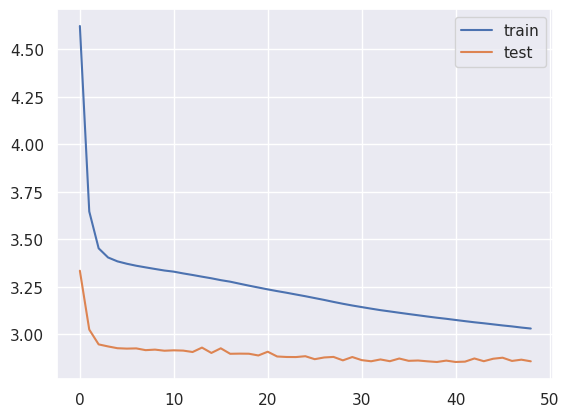

In [41]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [42]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [43]:
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [44]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [45]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [46]:
for i in range(0,20):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: দেশের চলমান রাজনৈতিক অস্থিরতার মধ্যে আগামী ১৮ জানুয়ারি অনুষ্ঠেয় রাজশাহী বিশ্ববিদ্যালয়ে নবম সমাবর্তন বর্জনের ঘোষণা দিয়েছেন বিএনপি জামায়াতপন্থী সাদা দলের শিক্ষকরা। 
Original summary: start রাবির সমাবর্তন বর্জনের ঘোষণা বিএনপিজামায়াত শিক্ষকদের end 
1/1 [==============================] - 0s 29ms/step
Predicted summary:  sostok start চট্টগ্রামে পুলিশের সংঘর্ষে নিহত end


Review: আন্তর্জাতিক ক্রিকেটে আট বছর কাটিয়ে দেওয়া ইমরুল কায়েস এখনও লড়ছেন সীমিত ওভারের ক্রিকেটে নিজের জায়গা পাকা করতে। ইংল্যান্ডের বিপক্ষে প্রস্তুতি ম্যাচে দুর্দান্ত শতক করা এই টপ অর্ডার ব্যাটসম্যানের উপলব্ধি গড়পড়তা পারফরম্যান্স করে জাতীয় দলে টিকে থাকা খুব কঠিন। 
Original summary: start অসাধারণ কিছু না করলে টেকা যাবে না end 
1/1 [==============================] - 0s 27ms/step
Predicted summary:  sostok start চট্টগ্রামে পুলিশের সংঘর্ষে নিহত end


Review: ৩০শে জানুয়ারি পর্দা নামলো ৮ম আন্তর্জাতিক শিশু চলচ্চিত্র উৎসবের। বরাবরের মত উৎসবের ইতি টানা হয়েছে প্রতিযোগিতায় অংশ নেয়া সেরা ক্ষুদে নির্মাতাদের পুরস্কৃত করার মাধ্যমে। 
